In [1]:
import my_modules.monte_carlo as mc
import numpy as np
import matplotlib.pyplot as plt

C:\Users\jdivers\PycharmProjects\df_image_analysis\.venv\Lib\site-packages\cupy\_environment.py:217: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(


In [2]:
dw = mc.OpticalMedium(n=1.33, mu_a=0.02, mu_s=0.003, g=0, type='water')
g = mc.OpticalMedium(n=1.523, mu_a=0, mu_s=0.003, g=0,type= 'glass')
t = mc.OpticalMedium(n=1.33, mu_a=5, mu_s=100, g=0.85, type='tissue')
surroundings_n = 1.33

# Simulation comparisons
| ID | System               | Simulation method | Recursion | Illumination direction | Illumination Incidence | Detector   | Comparison | Notes                                         |
|:---|:---------------------|:------------------|:----------|:-----------------------|:-----------------------|:-----------|:-----------|:----------------------------------------------|
| 1  | Tissue               | Manual Method     | False     | Normal                 | Origin                 | None       | A          |                                               |
| 2  | Tissue               | Photon Method     | False     | Normal                 | Origin                 | None       | AB         |                                               |
| 3  | Tissue               | Photon Method     | True      | Normal                 | Origin                 | None       | BC         |                                               |
| 4  | Tissue               | Photon Method     | True      | Oblique                | Origin                 | None       | CD         | Compared methods of direciton in sub-a and -b |
| 5  | Tissue               | Photon Method     | True      | Oblique                | Ring                   | None       | DE         |                                               |
| 6  | Tissue               | Photon Method     | True      | Oblique                | Ring                   | Inner cone | EF         |                                               |
| 7  | Water, Tissue        | Photon Method     | True      | Oblique                | Ring                   | Inner cone | FG         |                                               |
| 8  | Water, Glass, Tissue | Photon Method     | True      | Oblique                | Ring                   | Inner cone | G          |                                               |



## Simulation 1

In [3]:
s = mc.System(
    t, float('inf'), 
    surrounding_n=surroundings_n
)
n = 500

C:\Users\jdivers\PycharmProjects\df_image_analysis\my_modules\monte_carlo\monte_carlo.py:351: RuntimeWarning: invalid value encountered in multiply
  bumped_coords = np.nextafter(bumped_coords, float('inf') * self.directional_cosines)


0 total internal reflectance events.
0.00% of photons transmitted. 
22.54% of photons reflected 
77.45% of photons absorbed 
500 total photons simulated.
0.01% overage of photons.


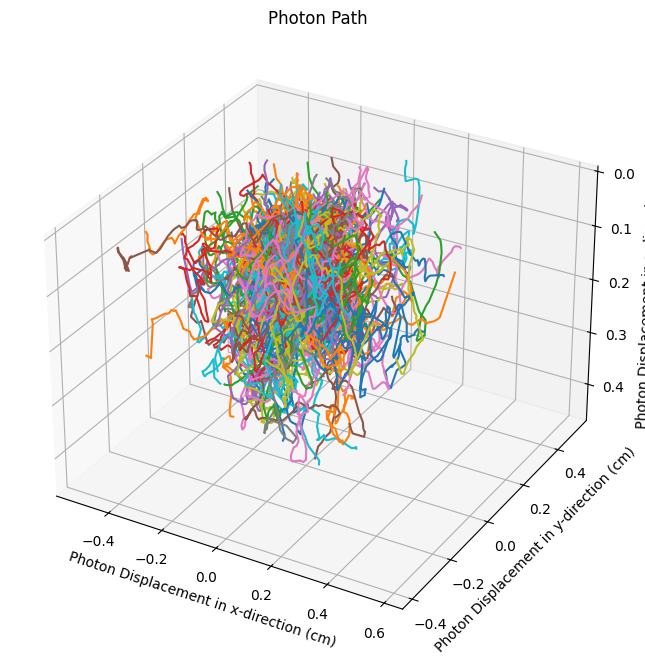

In [4]:
T, R, A = 3 * [0]
tir = 0
ax = None
for i in range(n):
    photon = mc.Photon(650, system=s, recurse=False, russian_roulette_constant=20)
    while not photon.is_terminated:
        photon.absorb()
        photon.move()
        photon.scatter()
    T += photon.T
    R += photon.R
    A += photon.A
    tir += photon.tir_count
    _, ax = photon.plot_path(axes=ax)
ax.invert_zaxis()
print("{}".format(tir) + ' total internal reflectance events.')
print("{:.2f}".format(T/n * 100) + '% of photons transmitted. ')
print("{:.2f}".format(R/n * 100) + '% of photons reflected ')
print("{:.2f}".format(A/n * 100) + '% of photons absorbed ')
print("{:.0f}".format(sum([T,R,A])) + ' total photons simulated.')
print("{:0.2f}% overage of photons.".format(100 * (n - sum([T,R,A])) / n))

## Simulation 2

0 total internal reflectance events.
0.00% of photons transmitted. 
22.44% of photons reflected 
77.54% of photons absorbed 
500 total photons simulated.
0.02% overage of photons.


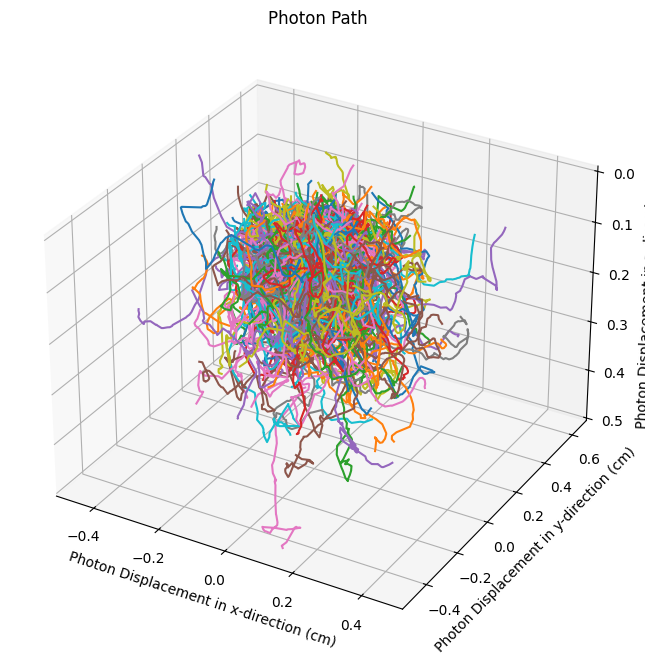

In [5]:
T, R, A = 3 * [0]
tir = 0
ax = None
for i in range(n):
    photon = mc.Photon(650, system=s, recurse=False, russian_roulette_constant=20)
    photon.simulate()
    T += photon.T
    R += photon.R
    A += photon.A
    tir += photon.tir_count
    _, ax = photon.plot_path(axes=ax)
ax.invert_zaxis()
print("{}".format(tir) + ' total internal reflectance events.')
print("{:.2f}".format(T/n * 100) + '% of photons transmitted. ')
print("{:.2f}".format(R/n * 100) + '% of photons reflected ')
print("{:.2f}".format(A/n * 100) + '% of photons absorbed ')
print("{:.0f}".format(sum([T,R,A])) + ' total photons simulated.')
print("{:0.2f}% overage of photons.".format(100 * (n - sum([T,R,A])) / n))

0 total internal reflectance events.
0.00% of photons transmitted. 
23.68% of photons reflected 
76.38% of photons absorbed 
500 total photons simulated.
-0.05% overage of photons.


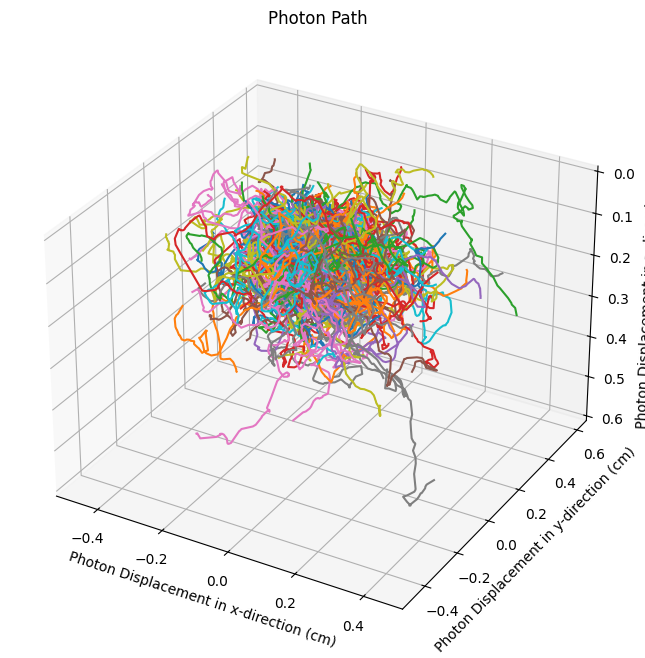

In [6]:
T, R, A = 3 * [0]
tir = 0
ax = None
for i in range(n):
    photon = mc.Photon(650, system=s, recurse=True, russian_roulette_constant=20)
    photon.simulate()
    T += photon.T
    R += photon.R
    A += photon.A
    tir += photon.tir_count
    _, ax = photon.plot_path(axes=ax)
ax.invert_zaxis()
print("{}".format(tir) + ' total internal reflectance events.')
print("{:.2f}".format(T/n * 100) + '% of photons transmitted. ')
print("{:.2f}".format(R/n * 100) + '% of photons reflected ')
print("{:.2f}".format(A/n * 100) + '% of photons absorbed ')
print("{:.0f}".format(sum([T,R,A])) + ' total photons simulated.')
print("{:0.2f}% overage of photons.".format(100 * (n - sum([T,R,A])) / n))

## Simulation 4
### 4a

0 total internal reflectance events.
0.00% of photons transmitted. 
36.03% of photons reflected 
63.93% of photons absorbed 
500 total photons simulated.
0.04% overage of photons.


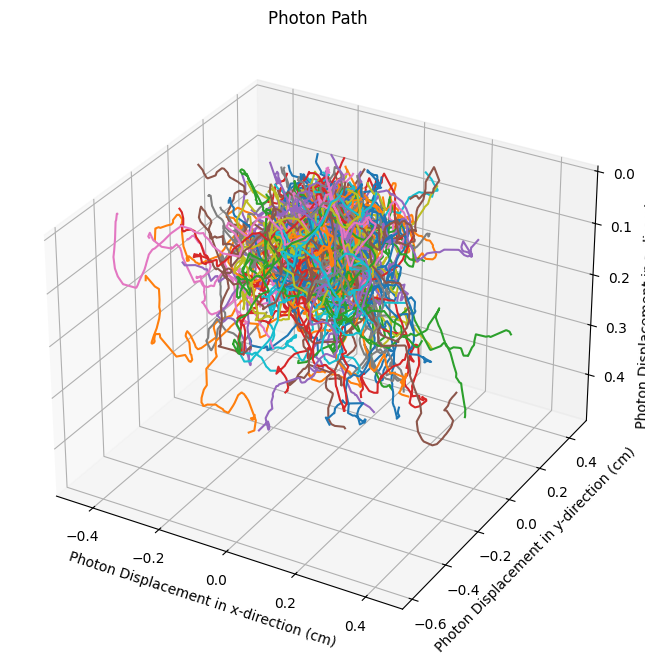

In [7]:
theta = np.arctan(-2.5 / 2)
phi = 2 * np.pi * np.random.rand()
dir_cos = np.array([np.sin(theta) * np.cos(phi), np.sin(theta) * np.sin(phi), np.cos(theta)])
T, R, A = 3 * [0]
tir = 0
ax = None
for i in range(n):
    photon = mc.Photon(650, directional_cosines=dir_cos, system=s, recurse=True, russian_roulette_constant=20)
    photon.simulate()
    T += photon.T
    R += photon.R
    A += photon.A
    tir += photon.tir_count
    _, ax = photon.plot_path(axes=ax)
ax.invert_zaxis()
print("{}".format(tir) + ' total internal reflectance events.')
print("{:.2f}".format(T/n * 100) + '% of photons transmitted. ')
print("{:.2f}".format(R/n * 100) + '% of photons reflected ')
print("{:.2f}".format(A/n * 100) + '% of photons absorbed ')
print("{:.0f}".format(sum([T,R,A])) + ' total photons simulated.')
print("{:0.2f}% overage of photons.".format(100 * (n - sum([T,R,A])) / n))

### 4b

0 total internal reflectance events.
0.00% of photons transmitted. 
32.91% of photons reflected 
67.12% of photons absorbed 
500 total photons simulated.
-0.04% overage of photons.


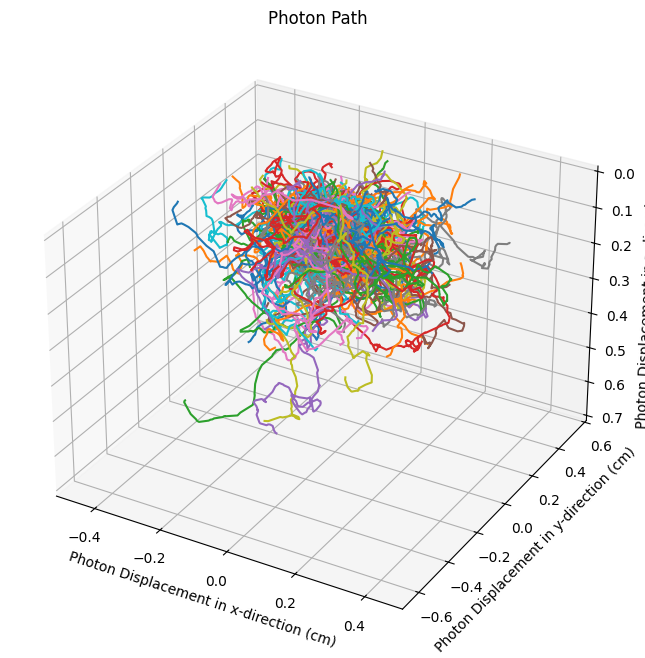

In [8]:
sampler = mc.monte_carlo.ring_pattern((0, 1), np.arctan(-2.5 / 2))
tir = 0
T, R, A = 3 * [0]
ax = None
for i in range(n):
    location, direction = sampler()
    photon = mc.Photon(650, directional_cosines=direction, system=s, recurse=True, russian_roulette_constant=20)
    photon.simulate()
    T += photon.T
    R += photon.R
    A += photon.A
    tir += photon.tir_count
    _, ax = photon.plot_path(axes=ax)
ax.invert_zaxis()
print("{}".format(tir) + ' total internal reflectance events.')
print("{:.2f}".format(T/n * 100) + '% of photons transmitted. ')
print("{:.2f}".format(R/n * 100) + '% of photons reflected ')
print("{:.2f}".format(A/n * 100) + '% of photons absorbed ')
print("{:.0f}".format(sum([T,R,A])) + ' total photons simulated.')
print("{:0.2f}% overage of photons.".format(100 * (n - sum([T,R,A])) / n))

## Simulation 5
### 5a

0 total internal reflectance events.
0.00% of photons transmitted. 
33.11% of photons reflected 
66.88% of photons absorbed 
500 total photons simulated.
0.01% overage of photons.


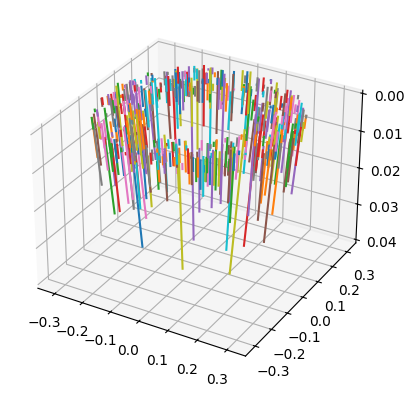

In [9]:
sampler = mc.monte_carlo.ring_pattern((0.16443276801785274, 0.3205672319821467), np.arctan(-2.5 / 2))
tir = 0
T, R, A = 3 * [0]
ax = None
ax2 = None
ax3 = plt.axes(projection='3d')
for i in range(n):
    location, direction = sampler()
    photon = mc.Photon(650, location_coordinates=location, directional_cosines=direction, system=s, recurse=True, russian_roulette_constant=20)
    photon.simulate()
    T += photon.T
    R += photon.R
    A += photon.A
    tir += photon.tir_count
    # fig1, ax = photon.plot_path(axes=ax)
    # fig2, ax2 = photon.plot_path(project_onto='xy', axes=ax2)
    x,y,z = zip(location, photon.location_history[1])
    ax3.plot(x, y, z)
ax3.invert_zaxis()
print("{}".format(tir) + ' total internal reflectance events.')
print("{:.2f}".format(T/n * 100) + '% of photons transmitted. ')
print("{:.2f}".format(R/n * 100) + '% of photons reflected ')
print("{:.2f}".format(A/n * 100) + '% of photons absorbed ')
print("{:.0f}".format(sum([T,R,A])) + ' total photons simulated.')
print("{:0.2f}% overage of photons.".format(100 * (n - sum([T,R,A])) / n))

### 5b

0 total internal reflectance events.
0.00% of photons transmitted. 
35.46% of photons reflected 
64.52% of photons absorbed 
500 total photons simulated.
0.02% overage of photons.


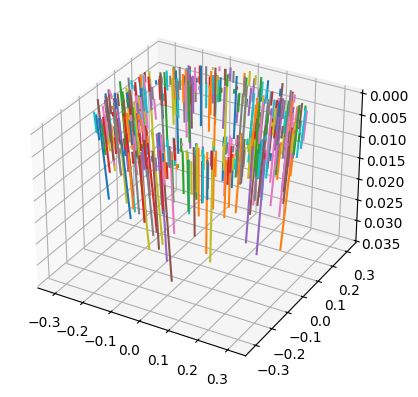

In [10]:
sampler = mc.monte_carlo.ring_pattern((0.16443276801785274, 0.3205672319821467), np.arctan(-2.5 / 2))
LED = mc.Illumination(pattern=sampler)
s.illuminator = LED
tir = 0
T, R, A = 3 * [0]
ax = None
ax2 = None
ax3 = plt.axes(projection='3d')
for i in range(n):
    location, direction = sampler()
    photon = s.beam(location_coordinates=location, directional_cosines=direction, recurse=True, russian_roulette_constant=20)
    photon.simulate()
    T += photon.T
    R += photon.R
    A += photon.A
    tir += photon.tir_count
    # _, ax = photon.plot_path(axes=ax)
    # _, ax2 = photon.plot_path(project_onto='xy', axes=ax2)
    x,y,z = zip(location, photon.location_history[1])
    ax3.plot(x, y, z)
ax3.invert_zaxis()
print("{}".format(tir) + ' total internal reflectance events.')
print("{:.2f}".format(T/n * 100) + '% of photons transmitted. ')
print("{:.2f}".format(R/n * 100) + '% of photons reflected ')
print("{:.2f}".format(A/n * 100) + '% of photons absorbed ')
print("{:.0f}".format(sum([T,R,A])) + ' total photons simulated.')
print("{:0.2f}% overage of photons.".format(100 * (n - sum([T,R,A])) / n))

## Simulation 6
### 6a

0 total internal reflectance events.
0.00% of photons transmitted. 
37.17% of photons reflected 
62.83% of photons absorbed 
500 total photons simulated.
4.94% of photons detected 
-0.01% overage of photons.


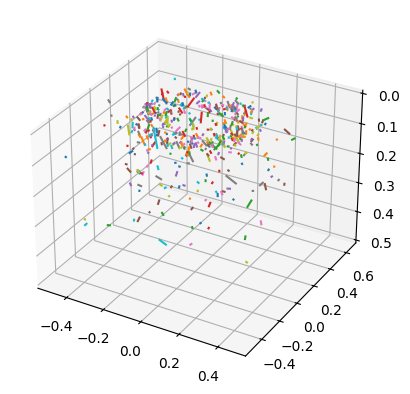

In [11]:
sampler = mc.monte_carlo.ring_pattern((0.16443276801785274, 0.3205672319821467), np.arctan(-2.5 / 2))
LED = mc.Illumination(pattern=sampler)
s.illuminator = LED
tir = 0
T, R, A = 3 * [0]
detected = 0
ax = None
ax2 = None
ax3 = plt.axes(projection='3d')
for i in range(n):
    location, direction = sampler()
    photon = s.beam(location_coordinates=location, directional_cosines=direction, recurse=True, russian_roulette_constant=20)
    photon.simulate()
    exit_r = np.sqrt(photon.exit_location[0] ** 2 + photon.exit_location[1] ** 2)  if photon.exit_location is not None else float('inf')
    if exit_r < 0.16443276801785274:
        detected += photon.R
    T += photon.T
    R += photon.R
    A += photon.A
    tir += photon.tir_count
    # _, ax = photon.plot_path(axes=ax)
    # _, ax2 = photon.plot_path(project_onto='xy', axes=ax2)
    x,y,z = zip(photon.location_history[-3], photon.location_history[-2])
    ax3.plot(x, y, z)
ax3.invert_zaxis()
print("{}".format(tir) + ' total internal reflectance events.')
print("{:.2f}".format(T/n * 100) + '% of photons transmitted. ')
print("{:.2f}".format(R/n * 100) + '% of photons reflected ')
print("{:.2f}".format(A/n * 100) + '% of photons absorbed ')
print("{:.0f}".format(sum([T,R,A])) + ' total photons simulated.')
print("{:.2f}".format(detected / n * 100) + '% of photons detected ')
print("{:0.2f}% overage of photons.".format(100 * (n - sum([T,R,A])) / n))

### 6b

0 total internal reflectance events.
0.00% of photons transmitted. 
34.64% of photons reflected 
65.40% of photons absorbed 
500 total photons simulated.
4.56% of photons detected 
-0.04% overage of photons.


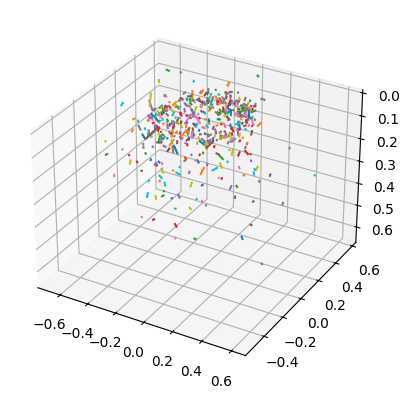

In [12]:
sampler = mc.monte_carlo.ring_pattern((0.16443276801785274, 0.3205672319821467), np.arctan(-2.5 / 2))
LED = mc.Illumination(pattern=sampler)
detector = mc.Detector(mc.monte_carlo.cone_of_acceptance(0.16443276801785274))
s.illuminator = LED
s.detector = detector
tir = 0
T, R, A = 3 * [0]
detected = 0
ax = None
ax2 = None
ax3 = plt.axes(projection='3d')
for i in range(n):
    location, direction = sampler()
    photon = s.beam(location_coordinates=location, directional_cosines=direction, recurse=True, russian_roulette_constant=20)
    photon.simulate()
    T += photon.T
    R += photon.R
    A += photon.A
    tir += photon.tir_count
    # _, ax = photon.plot_path(axes=ax)
    # _, ax2 = photon.plot_path(project_onto='xy', axes=ax2)
    x,y,z = zip(photon.location_history[-3], photon.location_history[-2])
    ax3.plot(x, y, z)
ax3.invert_zaxis()
print("{}".format(tir) + ' total internal reflectance events.')
print("{:.2f}".format(T/n * 100) + '% of photons transmitted. ')
print("{:.2f}".format(R/n * 100) + '% of photons reflected ')
print("{:.2f}".format(A/n * 100) + '% of photons absorbed ')
print("{:.0f}".format(sum([T,R,A])) + ' total photons simulated.')
print("{:.2f}".format(detector.n_detected / n * 100) + '% of photons detected ')
print("{:0.2f}% overage of photons.".format(100 * (n - sum([T,R,A])) / n))

## Simulation 7

In [13]:
s = mc.System(
    dw, 0.1,
    t, float('inf'), 
    surrounding_n=surroundings_n
)
n = 500

In [ ]:
sampler = mc.monte_carlo.ring_pattern((0.16443276801785274, 0.3205672319821467), np.arctan(-2.5 / 2))
LED = mc.Illumination(pattern=sampler)
detector = mc.Detector(mc.monte_carlo.cone_of_acceptance(0.16443276801785274))
s.illuminator = LED
s.detector = detector
tir = 0
T, R, A = 3 * [0]
detected = 0
ax = None
ax2 = None
ax3 = plt.axes(projection='3d')
for i in range(n):
    location, direction = sampler()
    photon = s.beam(location_coordinates=location, directional_cosines=direction, recurse=True, russian_roulette_constant=20)
    photon.simulate()
    T += photon.T
    R += photon.R
    A += photon.A
    tir += photon.tir_count
    # _, ax = photon.plot_path(axes=ax)
    # _, ax2 = photon.plot_path(project_onto='xy', axes=ax2)
    ax3.plot(*location)
# ax3.invert_zaxis()
print("{}".format(tir) + ' total internal reflectance events.')
print("{:.2f}".format(T/n * 100) + '% of photons transmitted. ')
print("{:.2f}".format(R/n * 100) + '% of photons reflected ')
print("{:.2f}".format(A/n * 100) + '% of photons absorbed ')
print("{:.0f}".format(sum([T,R,A])) + ' total photons simulated.')
print("{:.2f}".format(detector.n_detected / n * 100) + '% of photons detected ')
print("{:0.2f}% overage of photons.".format(100 * (n - sum([T,R,A])) / n))

## Simulation 8

In [ ]:
sampler = mc.monte_carlo.ring_pattern((0.16443276801785274, 0.3205672319821467), np.arctan(-2.5 / 2))
LED = mc.Illumination(pattern=sampler)
detector = mc.Detector(mc.monte_carlo.cone_of_acceptance(0.16443276801785274))
s.illuminator = LED
s.detector = detector
tir = 0
T, R, A = 3 * [0]
detected = 0
ax = None
ax2 = None
ax3 = plt.axes(projection='3d')
for i in range(n):
    location, direction = sampler()
    photon = s.beam(location_coordinates=location, directional_cosines=direction, recurse=True, russian_roulette_constant=20)
    photon.simulate()
    T += photon.T
    R += photon.R
    A += photon.A
    tir += photon.tir_count
    # _, ax = photon.plot_path(axes=ax)
    # _, ax2 = photon.plot_path(project_onto='xy', axes=ax2)
    x,y,z = zip(photon.location_history[-3], photon.location_history[-2])
    ax3.plot(x, y, z)
ax3.invert_zaxis()
print("{}".format(tir) + ' total internal reflectance events.')
print("{:.2f}".format(T/n * 100) + '% of photons transmitted. ')
print("{:.2f}".format(R/n * 100) + '% of photons reflected ')
print("{:.2f}".format(A/n * 100) + '% of photons absorbed ')
print("{:.0f}".format(sum([T,R,A])) + ' total photons simulated.')
print("{:.2f}".format(detector.n_detected / n * 100) + '% of photons detected ')
print("{:0.2f}% overage of photons.".format(100 * (n - sum([T,R,A])) / n))